<a href="https://colab.research.google.com/github/dipeg13/projects/blob/main/Audio%20dataset%20preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets download andradaolteanu/gtzan-dataset-music-genre-classification

 99% 1.20G/1.21G [00:06<00:00, 198MB/s]
100% 1.21G/1.21G [00:06<00:00, 187MB/s]


In [7]:
! unzip data.zip

Archive:  data.zip
  inflating: Data/features_30_sec.csv  
  inflating: Data/features_3_sec.csv  
  inflating: Data/genres_original/blues/blues.00000.wav  
  inflating: Data/genres_original/blues/blues.00001.wav  
  inflating: Data/genres_original/blues/blues.00002.wav  
  inflating: Data/genres_original/blues/blues.00003.wav  
  inflating: Data/genres_original/blues/blues.00004.wav  
  inflating: Data/genres_original/blues/blues.00005.wav  
  inflating: Data/genres_original/blues/blues.00006.wav  
  inflating: Data/genres_original/blues/blues.00007.wav  
  inflating: Data/genres_original/blues/blues.00008.wav  
  inflating: Data/genres_original/blues/blues.00009.wav  
  inflating: Data/genres_original/blues/blues.00010.wav  
  inflating: Data/genres_original/blues/blues.00011.wav  
  inflating: Data/genres_original/blues/blues.00012.wav  
  inflating: Data/genres_original/blues/blues.00013.wav  
  inflating: Data/genres_original/blues/blues.00014.wav  
  inflating: Data/genres_origina

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import librosa

In [11]:
def return_features(path):
  x , sr = librosa.load(path)
  chroma_stft = librosa.feature.chroma_stft(y=x, sr=sr)
  rmse = librosa.feature.rms(y=x)
  spec_cent = librosa.feature.spectral_centroid(y=x, sr=sr)
  spec_bw = librosa.feature.spectral_bandwidth(y=x, sr=sr)
  rolloff = librosa.feature.spectral_rolloff(y=x, sr=sr)
  zcr = librosa.feature.zero_crossing_rate(x)
  mfcc = librosa.feature.mfcc(y=x, sr=sr)
  return [chroma_stft.mean(), chroma_stft.var(), rmse.mean(), rmse.var(), spec_cent.mean(), spec_cent.var(), spec_bw.mean(), spec_bw.var(), rolloff.mean(), rolloff.var(), zcr.mean(), zcr.var(), mfcc.mean(), mfcc.var()]

In [23]:
data = []
for class_ in ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']:
  print(class_)
  for i in range(100):
    if i<10:
      path = '/content/Data/genres_original/' + class_ + '/' + class_ + '.0000'+ str(i) + '.wav'
    else:
      path = '/content/Data/genres_original/' + class_ + '/' + class_ + '.000' + str(i) + '.wav'
    line = return_features(path)
    line.append(class_)
    data.append(line)

blues
classical
country
disco
hiphop
jazz


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


NoBackendError: ignored

It seems that jazz.00054.wav is corrupted, so we pass it.

In [26]:
for class_ in ['jazz', 'metal', 'pop', 'reggae', 'rock']:
  print(class_)
  for i in range(100):
    if class_== 'jazz' and i <= 54:
      pass
    else:
      if i<10:
        path = '/content/Data/genres_original/' + class_ + '/' + class_ + '.0000'+ str(i) + '.wav'
      else:
        path = '/content/Data/genres_original/' + class_ + '/' + class_ + '.000' + str(i) + '.wav'
      line = return_features(path)
      line.append(class_)
      data.append(line)

jazz
metal
pop
reggae
rock


In [27]:
len(data)

1053

In [28]:
ndata = np.asarray(data)

In [41]:
df = pd.DataFrame(ndata, columns=['Chroma_stft- Mean', 'Chroma_stft - Var', 'Rmse - Mean', 'Rmse - Var', 'Spec_cent - Mean', 'Spec_cent - Var', 'Spec_bw - Mean', 'Spec_bw - Var', 'Rolloff - Mean', 'Rolloff - Var', 'Zcr - Mean', 'Zcr - Var', 'Mfcc - Mean', 'Mfcc - Var', 'Class'])

In [42]:
df = df.drop_duplicates()

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 986 entries, 0 to 1052
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Chroma_stft- Mean  986 non-null    object
 1   Chroma_stft - Var  986 non-null    object
 2   Rmse - Mean        986 non-null    object
 3   Rmse - Var         986 non-null    object
 4   Spec_cent - Mean   986 non-null    object
 5   Spec_cent - Var    986 non-null    object
 6   Spec_bw - Mean     986 non-null    object
 7   Spec_bw - Var      986 non-null    object
 8   Rolloff - Mean     986 non-null    object
 9   Rolloff - Var      986 non-null    object
 10  Zcr - Mean         986 non-null    object
 11  Zcr - Var          986 non-null    object
 12  Mfcc - Mean        986 non-null    object
 13  Mfcc - Var         986 non-null    object
 14  Class              986 non-null    object
dtypes: object(15)
memory usage: 123.2+ KB


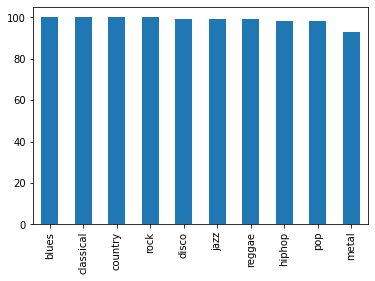

In [45]:
df['Class'].value_counts().plot(kind='bar')

In [46]:
from google.colab import files

df.to_csv('df.csv')
files.download('df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>